In [1]:
# project idea note
# https://docs.google.com/document/d/1_Tp3DhT_5sD2-RbuMpkKVjSKfcNsOQAvUdDc6ZCoJtc/edit?usp=sharing

# data 
# https://www.kaggle.com/valentinjoseph/avocado-sales-20152021-us-centric (no code)


#### Some relevant columns in the dataset:

Date - The date of the observation
averageprice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold  (The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table).
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold

In [2]:
# importing libraries 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import numpy as np
%matplotlib inline
import os
from statsmodels.tsa.seasonal import seasonal_decompose
from library.sb_utils import save_file
import warnings
plt.rcParams['figure.figsize'] = (10, 7)
#plt.style.use('seaborn-colorblind')
sns.set_style('whitegrid')

In [4]:
# importing dataset 

In [5]:
df = pd.read_csv('./data/df.csv', index_col='Date', parse_dates=True);
df_ne = pd.read_csv('./data/df_ne.csv', index_col='Date', parse_dates=True);
df_us = pd.read_csv('./data/df_us.csv', index_col='Date', parse_dates=True);
df_ny = pd.read_csv('./data/df_ny.csv', index_col='Date', parse_dates=True);

#### Inspction of the dataframe

In [6]:
df.head(2)

,AveragePrice,TotalVolume,type,year,region
Date,,,,,
2015-01-04,1.22,40873.28,conventional,2015,Albany
2015-01-04,1.79,1373.95,organic,2015,Albany


In [7]:
df_us.head(2)

,AveragePrice,TotalVolume,type,year,region
Date,,,,,
2015-01-04,0.95,31324277.73,conventional,2015,TotalUS
2015-01-04,1.46,612910.15,organic,2015,TotalUS


In [8]:
df_ne.head(2)

,AveragePrice,TotalVolume,type,year,region
Date,,,,,
2015-01-04,1.09,3759282.62,conventional,2015,Northeast
2015-01-04,1.88,48280.46,organic,2015,Northeast


In [9]:
df_ny.head(2)

,AveragePrice,TotalVolume,type,year,region
Date,,,,,
2015-01-04,1.93,17328.24,organic,2015,NewYork
2015-01-04,1.09,1402890.20,conventional,2015,NewYork


In [10]:
# Total_US_avocado_dataset
df_us_org=df_us[df_us['type']=='organic']
df_us_con=df_us[df_us['type']=='conventional']
# northeast region states(#Maine, New Hampshire, Vermont, 
# Massachusetts, Rhode Island, Connecticut, New York, New Jersey, and Pennsylvania)
df_ne_org=df_ne[df_ne['type']=='organic']
df_ne_con=df_ne[df_ne['type']=='conventional']
# New_york_avocado_dataset
df_ny_org=df_ny[df_ny['type']=='organic']
df_ny_con=df_ny[df_ny['type']=='conventional']

# EDA for all Regions -df

In [11]:
df.head(3)

,AveragePrice,TotalVolume,type,year,region
Date,,,,,
2015-01-04,1.22,40873.28,conventional,2015,Albany
2015-01-04,1.79,1373.95,organic,2015,Albany
2015-01-11,1.24,41195.08,conventional,2015,Albany


In [12]:
obesrvation_regions = df.groupby('region')['AveragePrice'].count().sort_values().to_frame()
obesrvation_regions.columns = ['nb_obs',]

<AxesSubplot:xlabel='nb_obs', ylabel='region'>

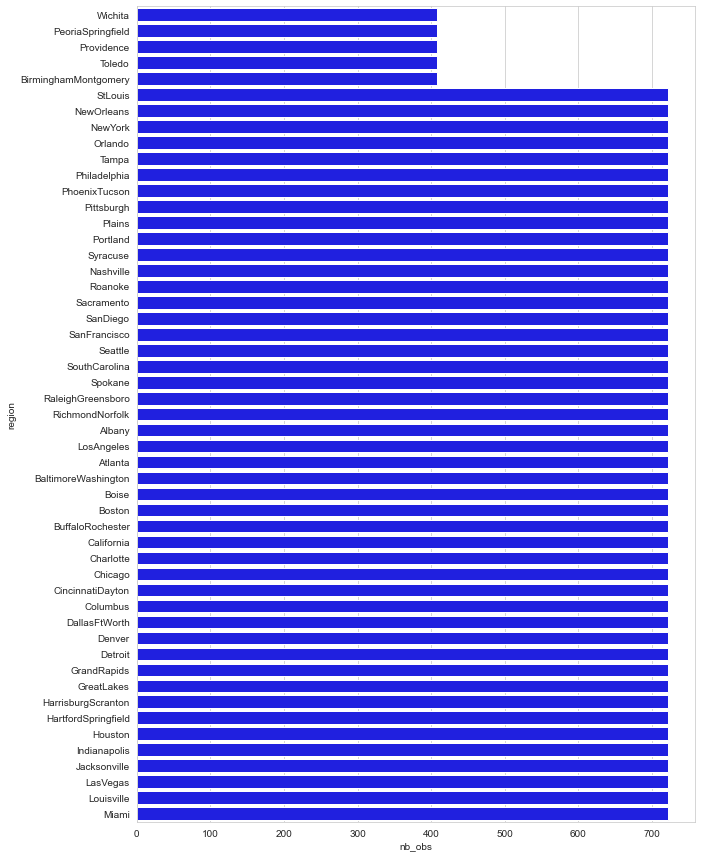

In [13]:
plt.subplots(figsize=(10, 15))
sns.barplot( y=obesrvation_regions.index , x="nb_obs", data=obesrvation_regions, color="blue")

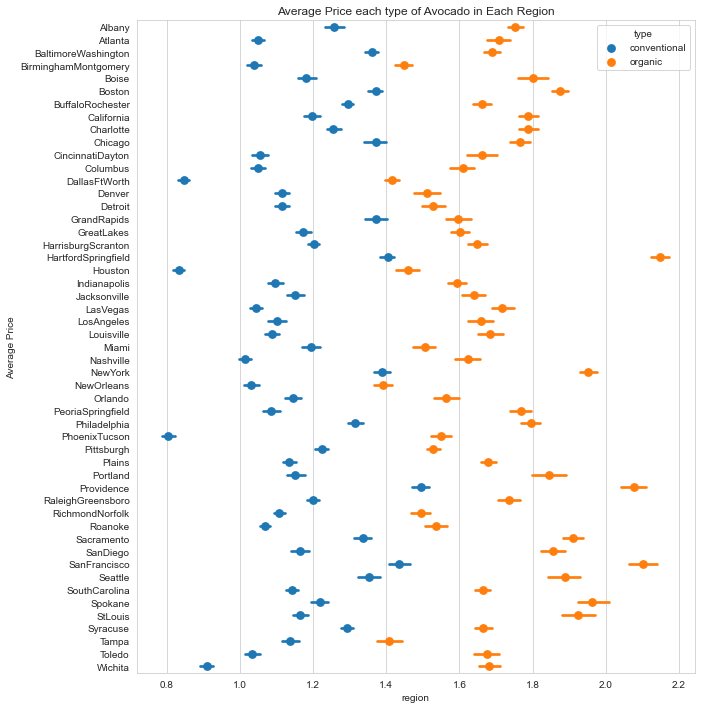

In [14]:
plt.figure(figsize=(10,12))
#sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='region', data=df, hue='type',join=False)
#plt.xticks(np.linspace(1,2,5))
plt.xlabel('region')
plt.ylabel('Average Price')
plt.title("Average Price each type of Avocado in Each Region")
plt.show()

C:\Users\mirei\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\mirei\anaconda3\lib\site-packages\seaborn\categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\mirei\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


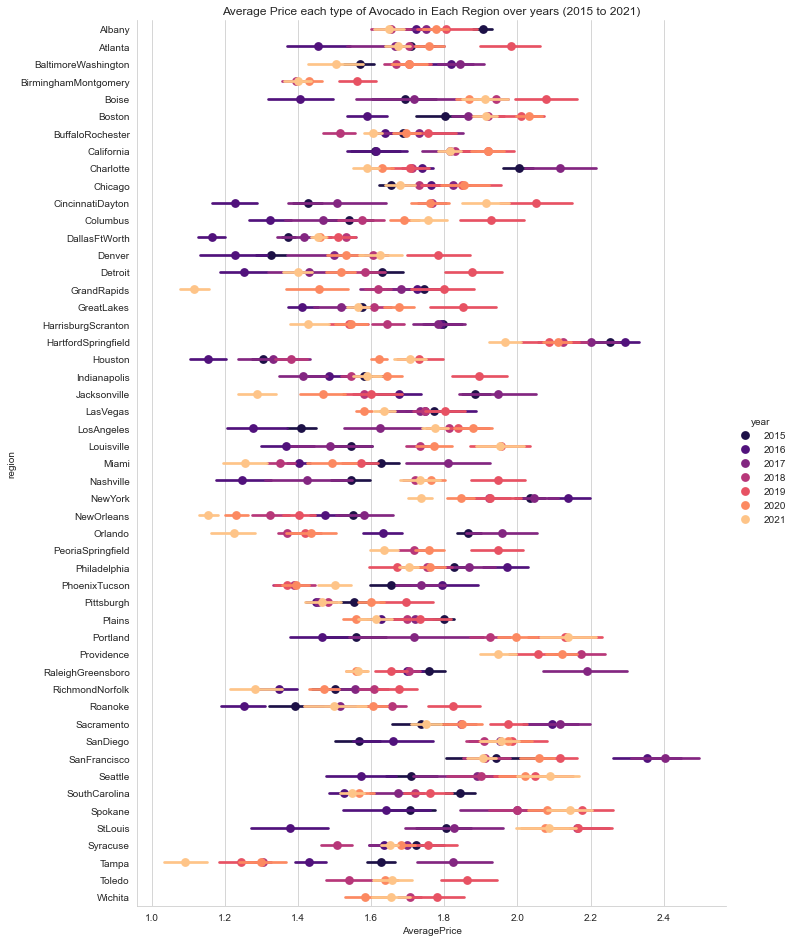

In [15]:
mask = df['type']=='organic'
g = sns.factorplot('AveragePrice','region',data=df[mask],
                   hue='year',
                   size=13,
                   aspect=0.8,
                   palette='magma',
                   join=False,
)
plt.title("Average Price each type of Avocado in Each Region over years (2015 to 2021)")
plt.show()

Text(0.5, 1.0, 'Total Volume of each type of Avocado in Each Region')

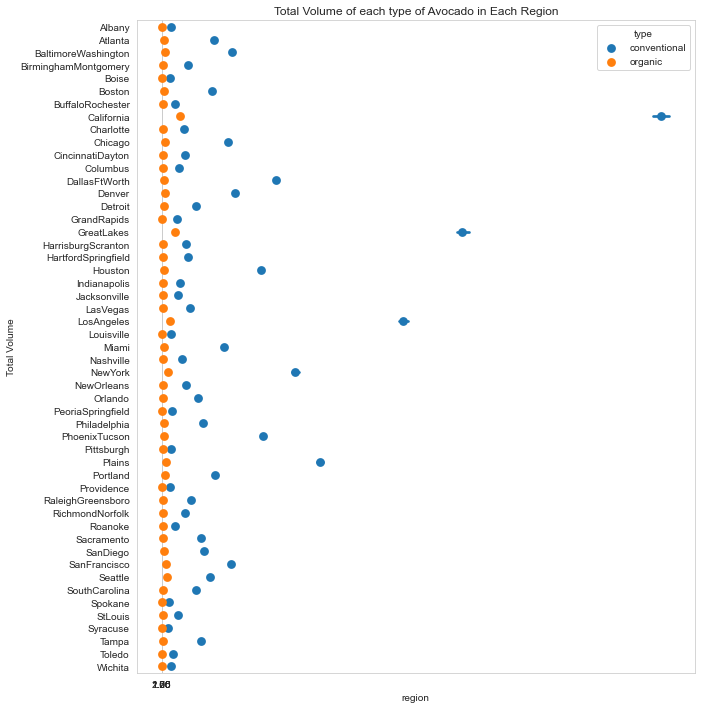

In [16]:
plt.figure(figsize=(10,12))
sns.pointplot(x='TotalVolume', y='region', data=df, hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('region')
plt.ylabel('Total Volume')
plt.title("Total Volume of each type of Avocado in Each Region")

In [17]:
# Total_US_avocado_dataset
df_org=df[df['type']=='organic']
df_con=df[df['type']=='conventional']

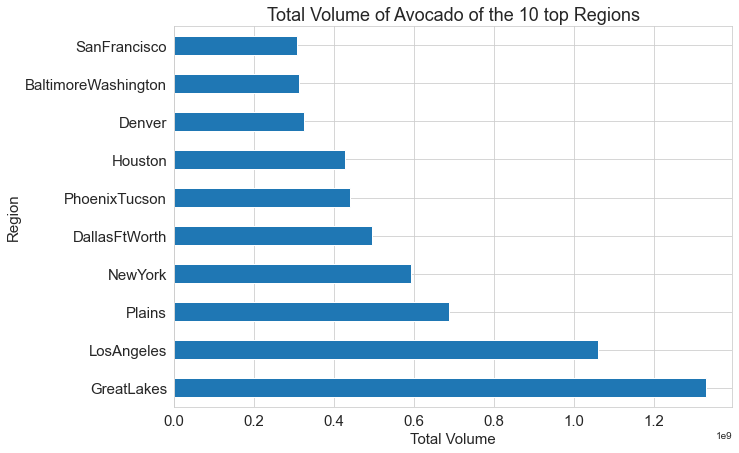

In [18]:
# Which cities had the highest/lowest volume
df.groupby(['region'])['TotalVolume'].sum().astype(int).sort_values(ascending=False)[:10].plot.barh(fontsize=15)
plt.ylabel('Region',fontsize=15)
plt.xlabel('Total Volume', fontsize=15)
plt.title("Total Volume of Avocado of the 10 top Regions", fontsize=18)
plt.show()

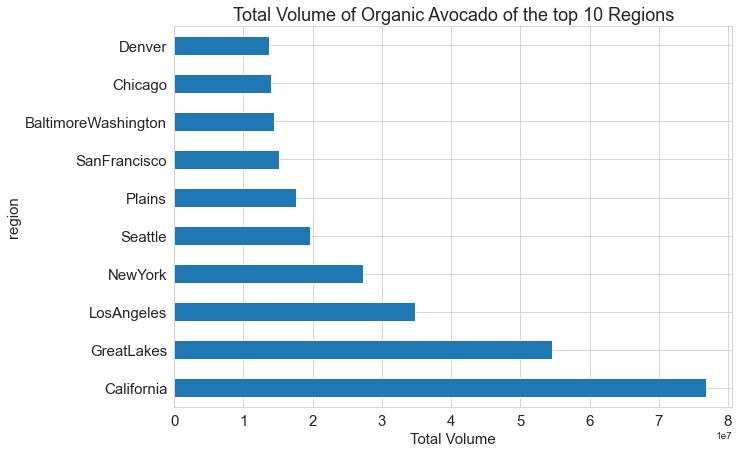

In [19]:
# What cities had the highest/lowest volume of organic avocado
df_org.groupby(['region'])['TotalVolume'].sum().astype(int).sort_values(ascending=False)[:10].plot.barh(fontsize=15)
plt.ylabel('region',fontsize=15)
plt.xlabel('Total Volume',fontsize=15)
plt.title("Total Volume of Organic Avocado of the top 10 Regions",fontsize=18)
plt.show()

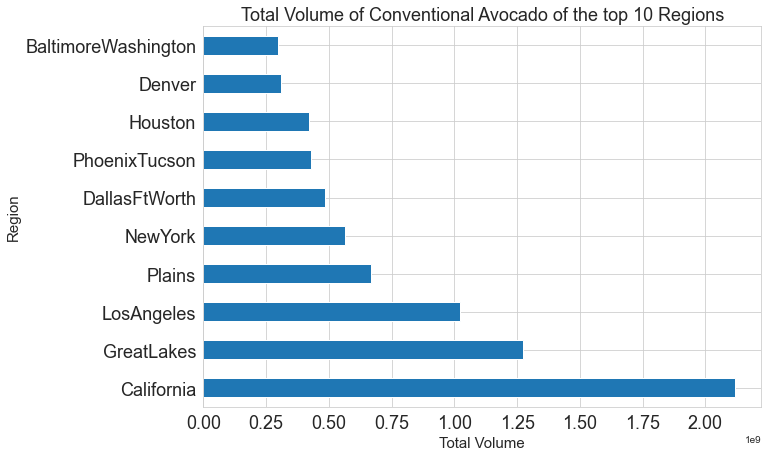

In [20]:
# What cities had the highest/lowest volume of conventional avocado
df_con.groupby(['region'])['TotalVolume'].sum().astype(int).sort_values(ascending=False)[:10].plot.barh(fontsize=18)
plt.ylabel('Region',fontsize=15)
plt.xlabel('Total Volume',fontsize=15)
plt.title("Total Volume of Conventional Avocado of the top 10 Regions",fontsize=18)
plt.show()

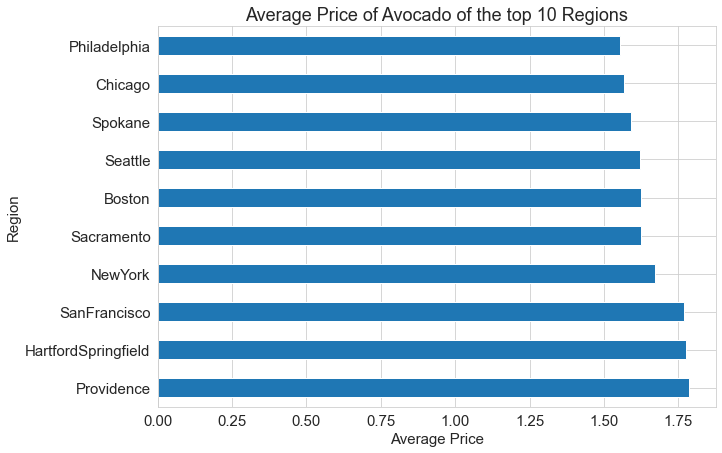

In [21]:
# What cities had the highest/lowest price
df.groupby(['region']).mean()['AveragePrice'].sort_values(ascending=False)[:10].plot.barh(fontsize=15)
plt.ylabel('Region',fontsize=15)
plt.xlabel('Average Price',fontsize=15)
plt.title("Average Price of Avocado of the top 10 Regions",fontsize=18)
plt.show()

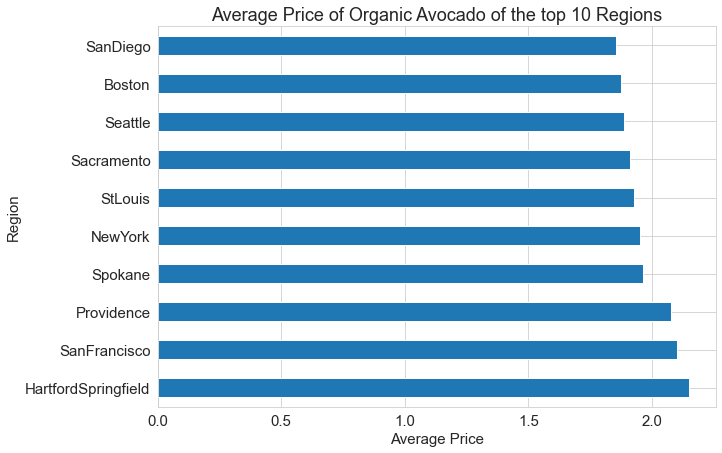

In [22]:
# What cities had the highest/lowest volume of organic price
df_org.groupby(['region']).mean()['AveragePrice'].sort_values(ascending=False)[:10].plot.barh(fontsize=15)
plt.ylabel('Region',fontsize=15)
plt.xlabel('Average Price',fontsize=15)
plt.title("Average Price of Organic Avocado of the top 10 Regions", fontsize=18)
plt.show()

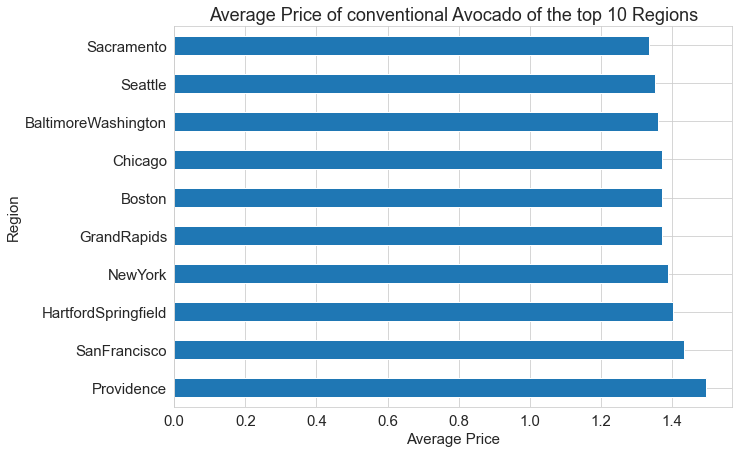

In [23]:
# What cities had the highest/lowest volume of conventional price
df_con.groupby(['region']).mean()['AveragePrice'].sort_values(ascending=False)[:10].plot.barh(fontsize=15)
plt.ylabel('Region',fontsize=15)
plt.xlabel('Average Price',fontsize=15)
plt.title("Average Price of conventional Avocado of the top 10 Regions",fontsize=18)
plt.show()

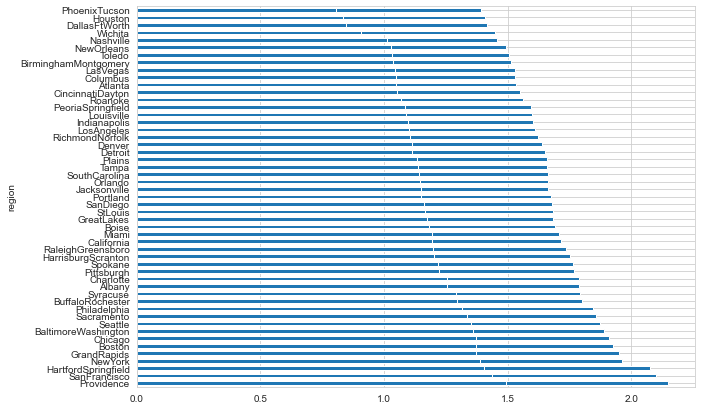

In [24]:
df_org.groupby(['region']).mean()['AveragePrice'].sort_values(ascending=False).plot.barh()
df_con.groupby(['region']).mean()['AveragePrice'].sort_values(ascending=False).plot.barh()
plt.show()

In [25]:
df1=df.copy().reset_index()

In [26]:
df1.head(3)

,Date,AveragePrice,TotalVolume,type,year,region
0,2015-01-04,1.22,40873.28,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,organic,2015,Albany
2,2015-01-11,1.24,41195.08,conventional,2015,Albany


In [27]:
B = df1.groupby(['region'])['AveragePrice'].agg([np.mean, np.std]).sort_values(by = 'mean', ascending = False)
B.reset_index().head(2)

,region,mean,std
0,Providence,1.785801,0.358444
1,HartfordSpringfield,1.776604,0.432024


<AxesSubplot:xlabel='region'>

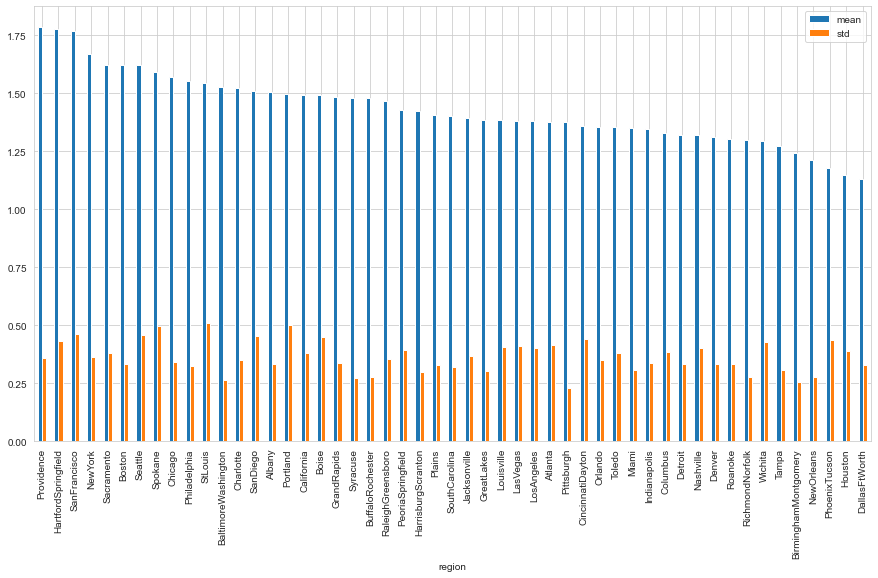

In [28]:
B.plot(kind = 'bar', rot=90, fontsize=10, figsize=(15, 8))

conventional    17626
organic         17626
Name: type, dtype: int64


C:\Users\mirei\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


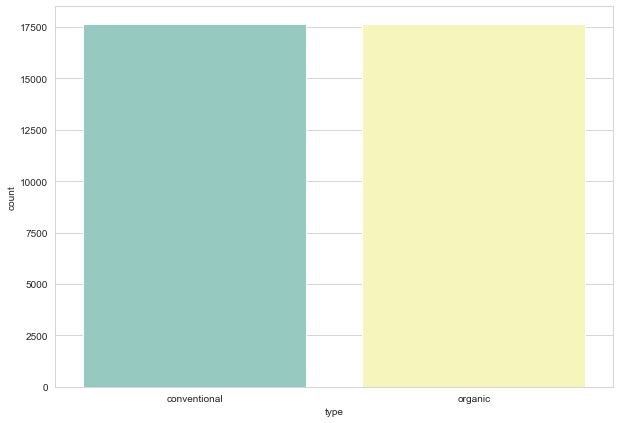

In [29]:
print(df['type'].value_counts())
sns.countplot('type', data=df, palette='Set3')

plt.show()

In [30]:
# Ingeneral, the price drop from 2019 to 2021 (due to covid 19)

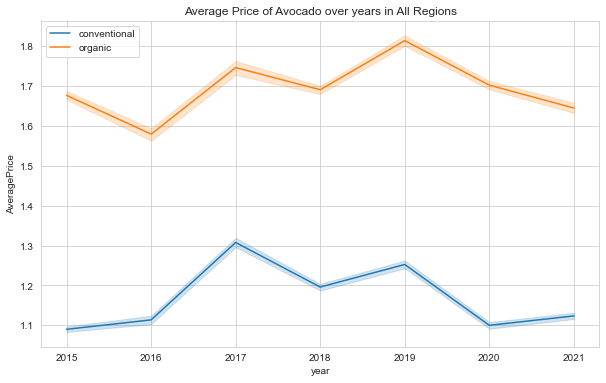

In [31]:
# yearly average prices by avocado type
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=df1, x="year", y="AveragePrice", hue="type")
ax.legend( loc='upper left')
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Average Price of Avocado over years in All Regions")
plt.show()

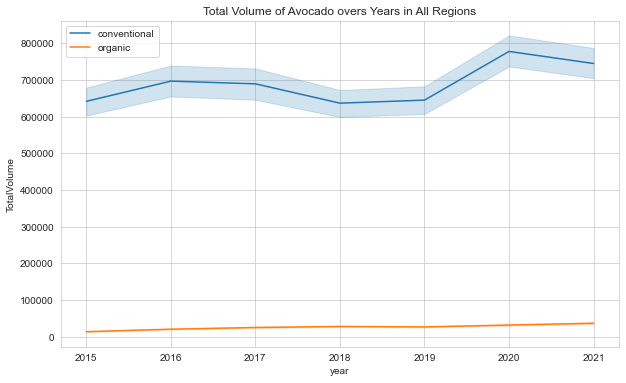

In [32]:
# yearly average prices by avocado type
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(data=df1, x="year", y="TotalVolume", hue="type")
ax.legend( loc='upper left')
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Total Volume of Avocado overs Years in All Regions")
plt.show()

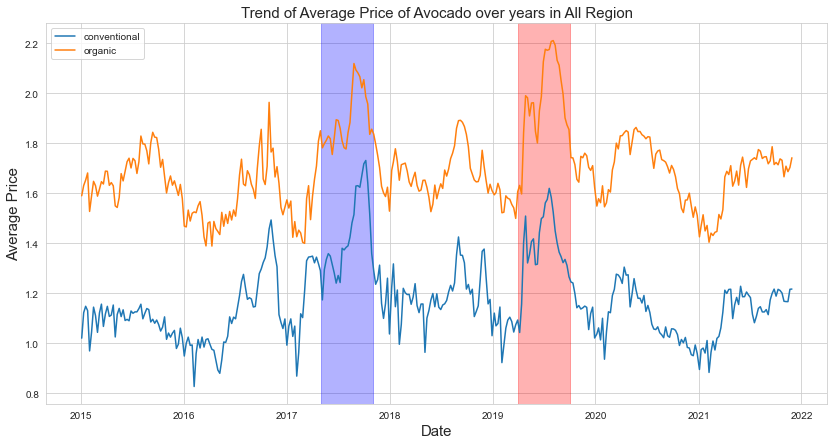

In [33]:
fig, ax = plt.subplots(figsize=(14,7))
sns.lineplot(data=df1, x="Date", y="AveragePrice", hue="type", ci=None)
# Add a vertical red shaded region
ax.axvspan('2017-05-01', '2017-11-01', color ='blue', alpha=0.3)
ax.axvspan('2019-04-01', '2019-10-01', color ='red', alpha=0.3)
ax.set_title('Trend of Average Price of Avocado over years in All Region',fontsize=15)
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('Average Price', fontsize=15)
ax.legend(loc='upper left') 
plt.show()

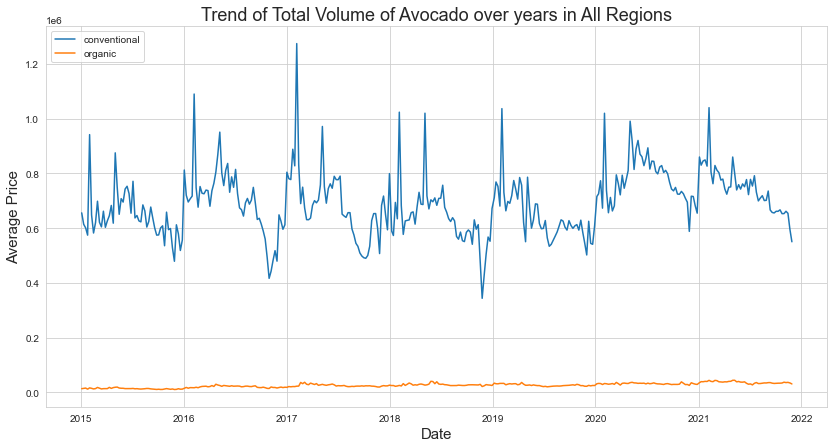

In [34]:
fig, ax = plt.subplots(figsize=(14,7))
sns.lineplot(data=df1, x="Date", y="TotalVolume", hue="type", ci=None)
ax.set_title('Trend of Total Volume of Avocado over years in All Regions',fontsize=18)
ax.set_xlabel('Date',fontsize=15)
ax.set_ylabel('Average Price', fontsize=15)
ax.legend(loc='upper left') 
plt.show()

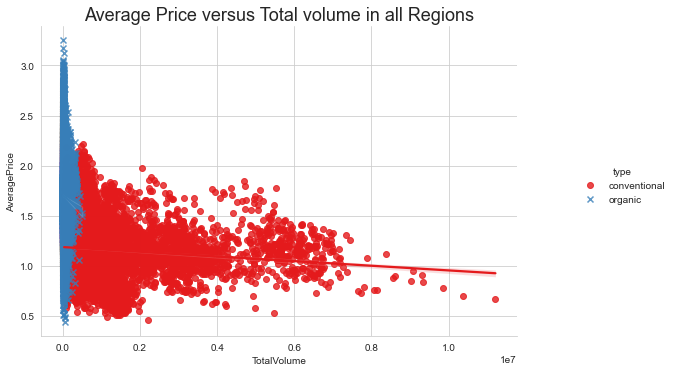

In [35]:
g= sns.lmplot(x="TotalVolume", y="AveragePrice", 
           data=df1, hue="type", markers=["o", "x"],palette="Set1")
g.fig.set_size_inches(10,5)
plt.title('Average Price versus Total volume in all Regions',fontsize=18)
plt.show()

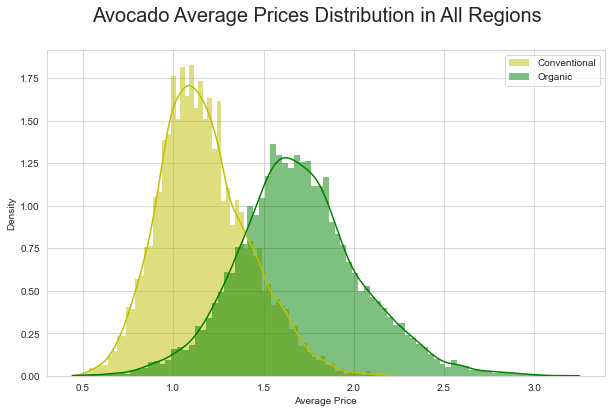

In [36]:
#sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Avocado Average Prices Distribution in All Regions', fontsize = 20)
ax1 = sns.histplot(df1[df1['type']=='conventional']["AveragePrice"],
                   color = 'y', label = 'Conventional', kde=True,
                   stat="density",linewidth=0)
ax2 = sns.histplot(df1[df1['type']=='organic']["AveragePrice"],
                   color = 'g', label = 'Organic', kde=True, stat="density",
                   linewidth=0)
ax.set_xlabel('Average Price')
plt.legend(title_fontsize = 12)
plt.show()

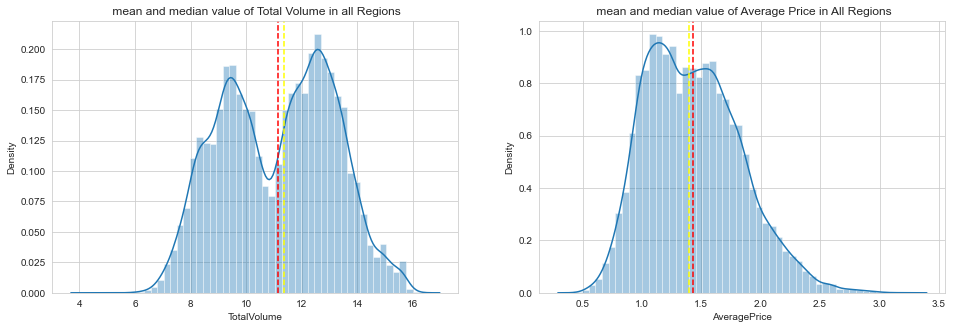

In [37]:
#  Plot the Distribution plots for the features
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(np.log(df1['TotalVolume']))
plt.axvline(np.log(df1['TotalVolume']).mean(), linestyle = '--', color = "red")
plt.axvline(np.log(df1['TotalVolume']).median(), linestyle = '--', color = "yellow")
plt.title(' mean and median value of Total Volume in all Regions')
plt.subplot(1,2,2)
sns.distplot(df1['AveragePrice'])
plt.axvline(df1['AveragePrice'].mean(), linestyle = '--', color = "red")
plt.axvline(df1['AveragePrice'].median(), linestyle = '--', color = "yellow")
plt.title(' mean and median value of Average Price in All Regions')
plt.show()

In [38]:
np.log(df1['TotalVolume']).mean()

11.15193782113004

In [39]:
df1['AveragePrice'].mean()

1.4325578043343183

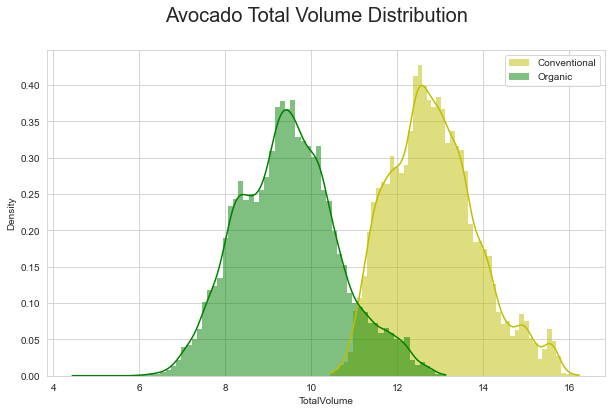

In [40]:
#sns.set_style("darkgrid")

fig, ax = plt.subplots(figsize=(10,6))
fig.suptitle('Avocado Total Volume Distribution', fontsize = 20)
ax1 = sns.histplot(np.log(df1[df1['type']=='conventional']["TotalVolume"]),
                   color = 'y', label = 'Conventional', kde=True,
                   stat="density",linewidth=0)
ax2 = sns.histplot(np.log(df1[df1['type']=='organic']["TotalVolume"]),
                   color = 'g', label = 'Organic', kde=True, stat="density",
                   linewidth=0)
ax.set_xlabel("TotalVolume")
plt.legend(title_fontsize = 12)
plt.show()

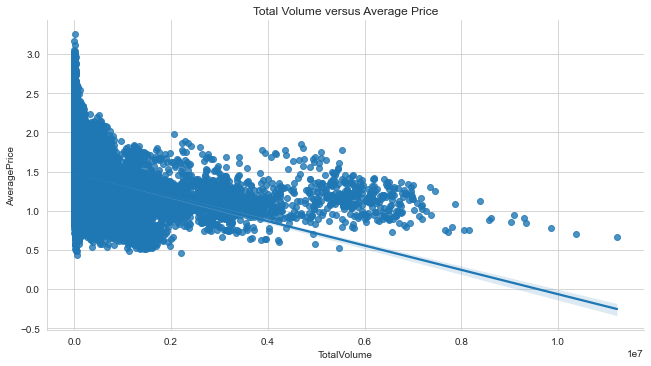

In [41]:
g= sns.lmplot(x='TotalVolume', y='AveragePrice', 
           data=df1)
g.fig.set_size_inches(10,5)
plt.title('Total Volume versus Average Price')
plt.show()

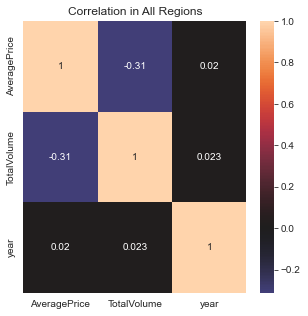

In [42]:
#  correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), center=0, annot=True)
plt.title('Correlation in All Regions')
plt.show()

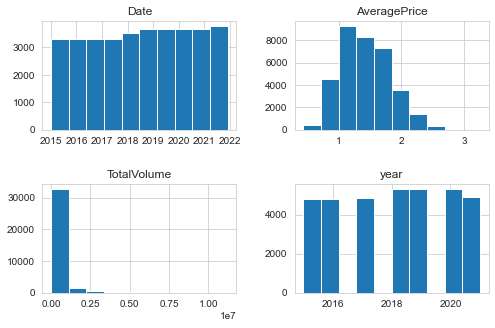

In [43]:
#view the distribution of data 
df1.hist(figsize=(8, 5) )
plt.subplots_adjust(hspace=0.5);

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

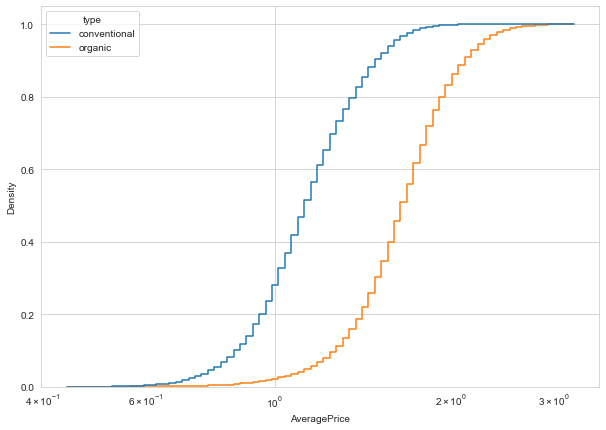

In [44]:
sns.histplot(
    data=df1, x="AveragePrice", hue="type",
    log_scale=True, element="step", fill=False,
    cumulative=True, stat="density", common_norm=False,
)

In [45]:
print(df_org.describe()), print(df_con.describe())

       AveragePrice    TotalVolume          year
count  17626.000000   17626.000000  17626.000000
mean       1.695166   26142.092870   2018.051174
std        0.342948   42112.993004      1.975450
min        0.440000      84.560000   2015.000000
25%        1.475045    5545.982500   2016.000000
50%        1.677798   12508.720000   2018.000000
75%        1.895507   26719.442500   2020.000000
max        3.250000  501557.150000   2021.000000
       AveragePrice   TotalVolume          year
count  17626.000000  1.762600e+04  17626.000000
mean       1.169949  6.904195e+05   2018.051174
std        0.250209  1.031068e+06      1.975450
min        0.460000  3.369968e+04   2015.000000
25%        0.994567  1.761061e+05   2016.000000
50%        1.142522  3.482250e+05   2018.000000
75%        1.324731  7.160161e+05   2020.000000
max        2.220000  1.121360e+07   2021.000000


(None, None)

In [57]:
print(df.describe().round(3))

       AveragePrice   TotalVolume       year
count     35252.000  3.525200e+04  35252.000
mean          1.433  3.582808e+05   2018.051
std           0.399  8.017119e+05      1.975
min           0.440  8.456000e+01   2015.000
25%           1.120  1.250920e+04   2016.000
50%           1.400  8.759901e+04   2018.000
75%           1.700  3.494813e+05   2020.000
max           3.250  1.121360e+07   2021.000


In [59]:
datapath = './data'
#save_file(df, 'df.csv', datapath)

In [60]:
df_org.describe().to_excel("./data/describe_org_All.xlsx")

In [61]:
df_con.describe().to_excel("./data/describe_con_All.xlsx")

# outliers  for all Regions -df

In [47]:
#https://www.kaggle.com/abdulmeral/avocado-all-in-one

Box plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

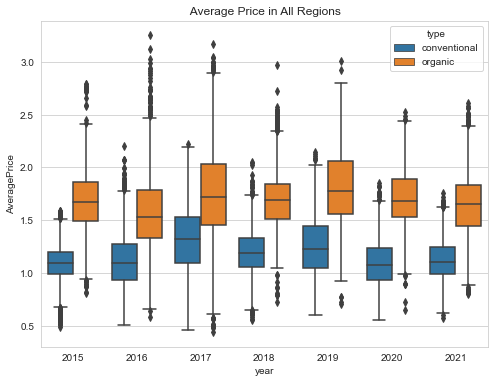

In [48]:
plt.subplots(figsize=(8,6))
sns.boxplot('year','AveragePrice', hue = 'type', data = df)
plt.title(' Average Price in All Regions')
plt.show()

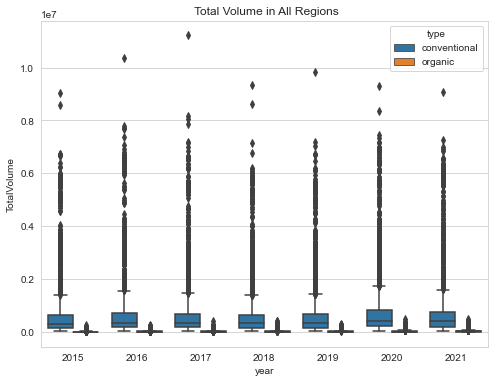

In [49]:
plt.subplots(figsize=(8,6))
sns.boxplot('year','TotalVolume', hue = 'type', data = df)
plt.title(' Total Volume in All Regions')
plt.show()

# visualizing_time_series

In [50]:
def visualizing_time_serie_tw(df):
    ax= df['AveragePrice'].resample('M').mean().plot(linewidth=2, fontsize=8,color='blue' );
    ax2 = ax.twinx()
    ax2=df['TotalVolume'].resample('M').mean().plot(linewidth=2, fontsize=8,color='red' );
    ax.set_ylabel('Average Price', fontsize=10)
    ax2.set_ylabel('Total Volume', fontsize=10)
    ax.set_title('Average Price and Total Volume - ALL Regions', fontsize=12)
    plt.legend()
    plt.show()
    return ax

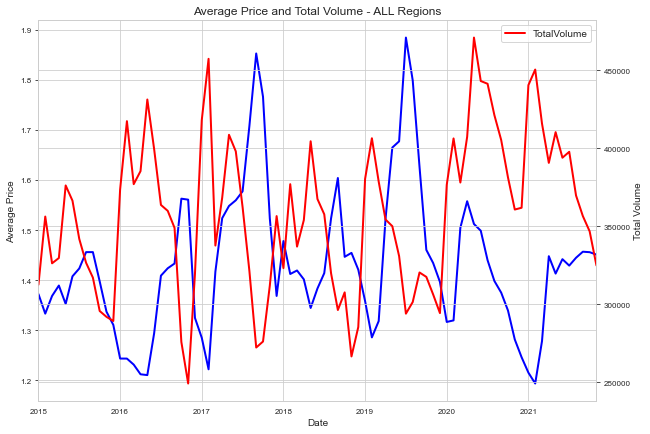

<AxesSubplot:title={'center':'Average Price and Total Volume - ALL Regions'}, xlabel='Date', ylabel='Average Price'>

In [51]:
visualizing_time_serie_tw(df)

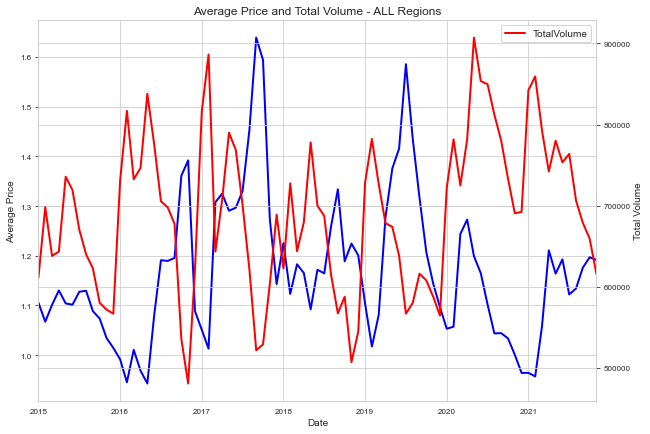

<AxesSubplot:title={'center':'Average Price and Total Volume - ALL Regions'}, xlabel='Date', ylabel='Average Price'>

In [52]:
visualizing_time_serie_tw(df_con)

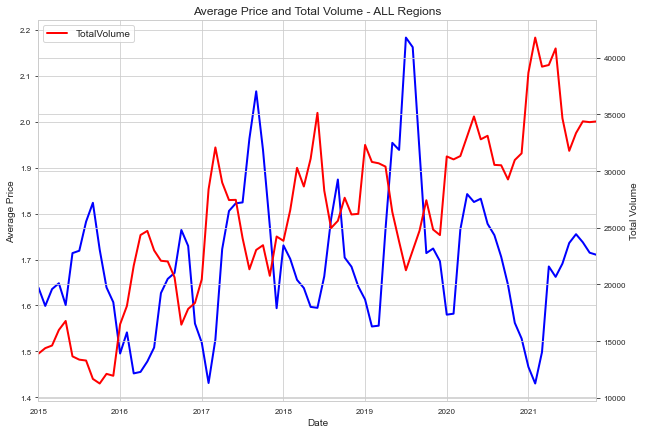

<AxesSubplot:title={'center':'Average Price and Total Volume - ALL Regions'}, xlabel='Date', ylabel='Average Price'>

In [53]:
visualizing_time_serie_tw(df_org)

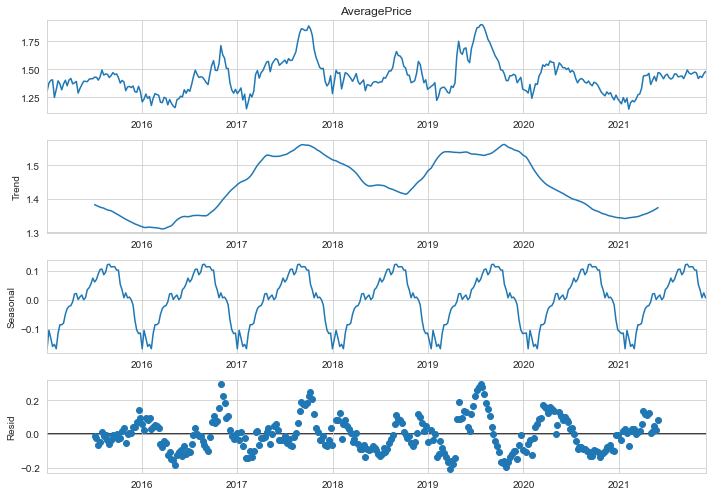

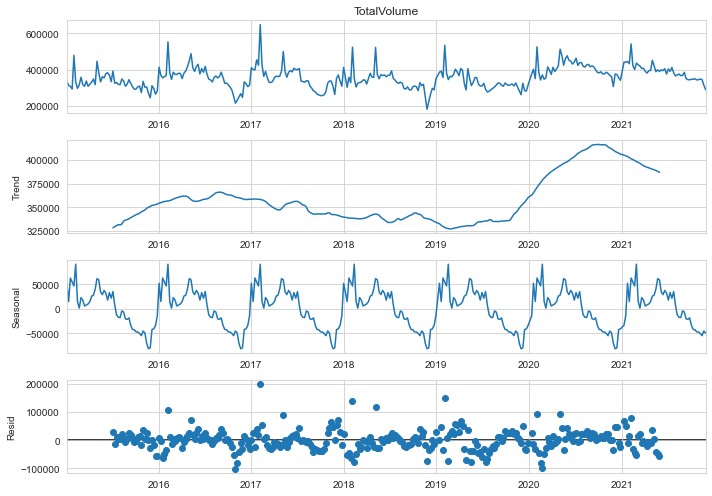

In [54]:
price = seasonal_decompose(df['AveragePrice'].resample('W').mean().dropna(),period = 52).plot()
vol = seasonal_decompose(df['TotalVolume'].resample('W').mean().dropna(),period = 52).plot()
plt.show()

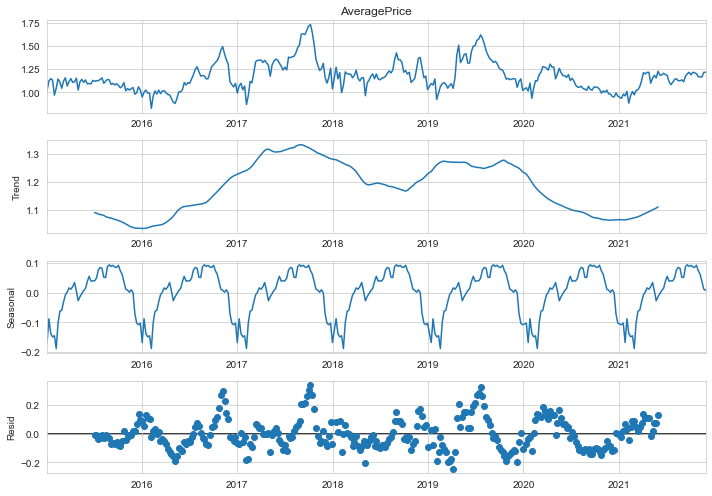

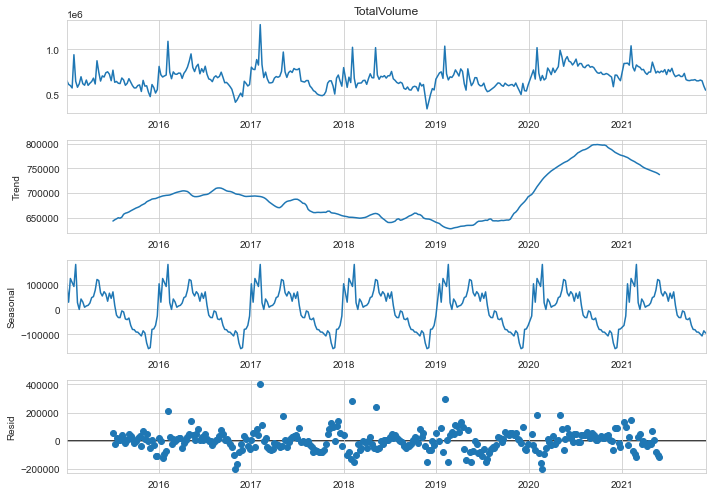

In [55]:
price = seasonal_decompose(df_con['AveragePrice'].resample('W').mean().dropna(),period = 52).plot()
vol = seasonal_decompose(df_con['TotalVolume'].resample('W').mean().dropna(),period = 52).plot()
plt.show()

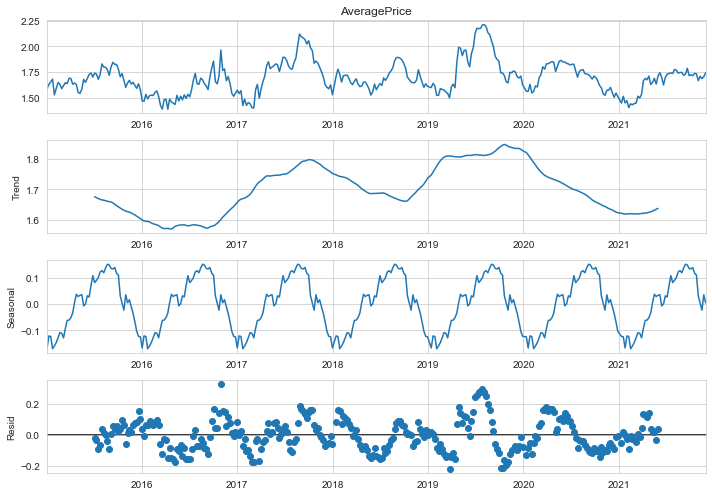

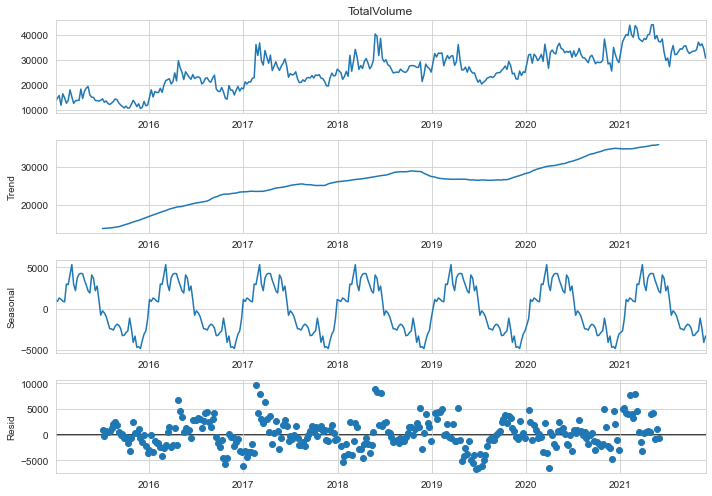

In [56]:
price = seasonal_decompose(df_org['AveragePrice'].resample('W').mean().dropna(),period = 52).plot()
vol = seasonal_decompose(df_org['TotalVolume'].resample('W').mean().dropna(),period = 52).plot()
plt.show()